#  PHYSICAL MODELS OF LIVING SYSTEMS

## Homework - week 4 & 5


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------

1) Generate a random a SxS matrix with C non zero entries and 1-C zeros (C is between zero and one). Set the diagonal to -d. The non-zero elements are drawn  from a given distributions. Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 


2) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with S (use S=20,30,40,..100) and compares your numerical finding with the analytical expectations (we did not explicitly have calculated this in class). 

3) Analyse the food web using the metrics we have seen in class. The file represent the weighted adjacency matrix of the food web. For the analysis you can binarize (zero and one) the matrix. You find the file in the google drive.

4) Optional: calculate the same as 1) but with for the cascade model or for the nested mutualistic network.

You follow detailed step by step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (also uploaded in the Google Drive, note folder)

-----------------------------------------------------------------------------------------------------------------------

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
import numpy as np
import random as rnd
rnd.seed()
import math as math
import time
import csv 
%matplotlib inline

### Random matrix

In [2]:
S = 5 # number of species
d = 1  # value of number coefficients
C = 0.4  # desired level of connectance
sigma = 1  # standard derivation of rv X

matrix = []
for i in range(0,5):
    matrix.append(np.random.uniform(0, 1, size=5)) # Uniform distribution U(0, 1)
    for j in range(0,i):
        matrix[i][j] = matrix[j][i]
        if j <= C:
            matrix[i][j] = np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        else:
            matrix[i][j] = 0
        matrix[i][i] = matrix[j][j] = -d
print("Random matrix:")        
matrix

Random matrix:


[array([-1.        ,  0.43030103,  0.09587099,  0.01814244,  0.1822384 ]),
 array([ 3.05128348, -1.        ,  0.12888586,  0.60157814,  0.2972848 ]),
 array([ 2.21497711,  0.        , -1.        ,  0.81382518,  0.21154632]),
 array([-1.25109256,  0.        ,  0.        , -1.        ,  0.58355987]),
 array([ 7.01282241,  0.        ,  0.        ,  0.        , -1.        ])]

time of calculations:  1.0618538856506348  seconds


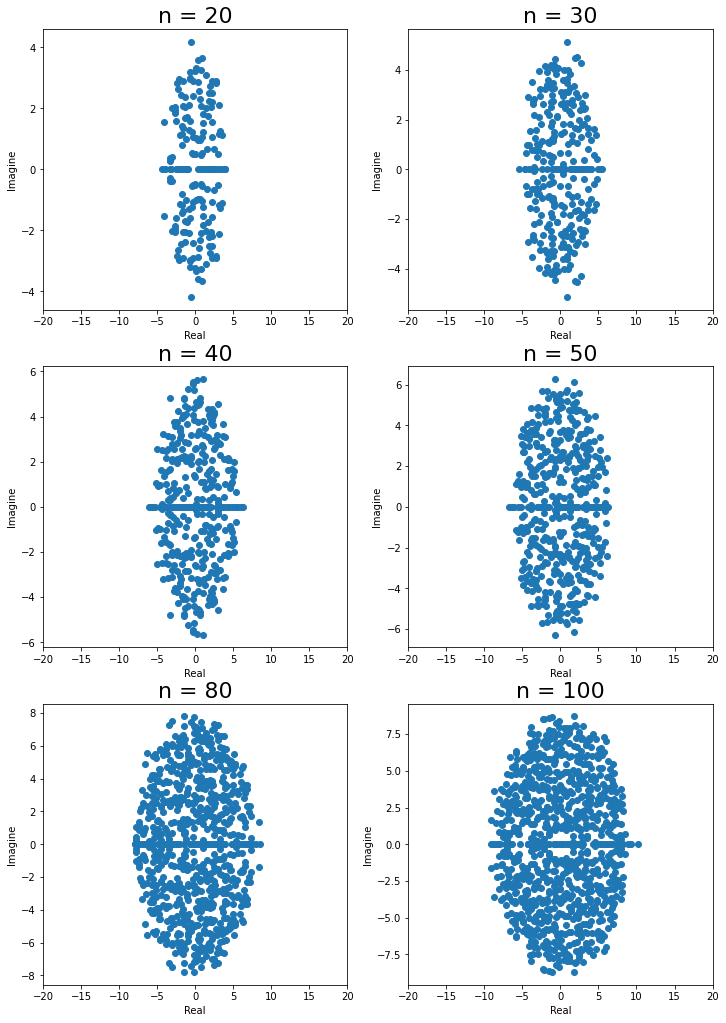

In [3]:
size_n = [20,30,40,50,80,100] #size of the matrix
MC = 10 #number of monte carlo simulations
start = time.time() #to calculate running time
eigenvalues = []
max_eigenvalues = []
for size in range(0,len(size_n)): 
    n = size_n[size]
    eigenvalues.append([])
    max_eigenvalues.append([])
    for mc in range(0,MC):
        matrix = []
        for i in range(n):
            matrix.append(np.random.uniform(0.0, sigma^2, size=n))
        ev=np.linalg.eigvals(matrix) #ev=eigenvalue
        for k in range(0,n):
            eigenvalues[size].append(ev[k])
            for j in range(0,i):
                matrix[i][j] = matrix[j][i]
                if j <= C:
                    matrix[i][j] = np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                else:
                    matrix[i][j] = 0
                matrix[i][i] = matrix[j][j] = -d            
            
end = time.time() #to calculate running time
print("time of calculations: ",end-start," seconds")
#------------------------------------------------------------------------------------------------------------------------
ev_re = [] #eigenvalue real part
ev_im = [] #eigenvalue imaginary part
matrix_figure=plt.figure(1,figsize=[12,30])
for size in range(0,len(size_n)):
    ev_re.append([])
    ev_im.append([])
    for i in range(0,len(eigenvalues[size])):
        ev_re[size].append(eigenvalues[size][i].real)
        ev_im[size].append(eigenvalues[size][i].imag)
    a=plt.subplot(5,2,size+1)
    plt.plot(ev_re[size],ev_im[size],'o')
    plt.xlabel('Real')
    plt.ylabel('Imagine')
    plt.xlim(-20,20)
    plt.title(' '.join(['n =',str(size_n[size])]),fontsize=22)

In circular law, all the eigenvalues of $ \frac{\alpha}{\sqrt(s)} $ are uniform distributed within the unitary disk in the complex plane. All the entries of $ \frac{\alpha}{\sqrt(s)} $ are real, so its characteristic polynomial has all real coefficients, and so its roots come in conjugate pairs. If we randomly generated complex entries for $ \frac{\alpha}{\sqrt(s)} $ we would not have such symmetry.

### Prey-Predator matrix

In [4]:
S = 5 # number of species
d = 1  # value of number coefficients
C = 0.2  # desired level of connectance
sigma = 1  # standard derivation of rv X

matrix = []
for i in range(0,5):
    matrix.append(np.random.uniform(0, 1, size=5)) # Uniform distribution U(0, 1)
    for j in range(0,i):
        if j <= C:
            matrix[i][j] = matrix[j][i]
        elif j <= 0.5:
            matrix[i][j] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
            matrix[j][i] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        elif j > 0.5:
            matrix[j][i] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
            matrix[i][j] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        else:
            matrix[i][j] = 0
            matrix[j][i] = 0
        matrix[i][i] = matrix[j][j] = -d
print("Predator-Prey matrix:")        
matrix

Predator-Prey matrix:


[array([-1.        ,  0.24222462,  0.63247529,  0.85956381,  0.87412868]),
 array([ 0.24222462, -1.        , -0.13918218, -1.2619218 ,  0.81508464]),
 array([ 0.63247529,  2.57743915, -1.        , -0.54508613, -0.55209772]),
 array([ 0.85956381, -4.03791128, -1.16807588, -1.        , -0.47012714]),
 array([ 0.87412868,  0.00494122, -1.64466652, -1.44568475, -1.        ])]

time of calculations:  6.4143993854522705  seconds


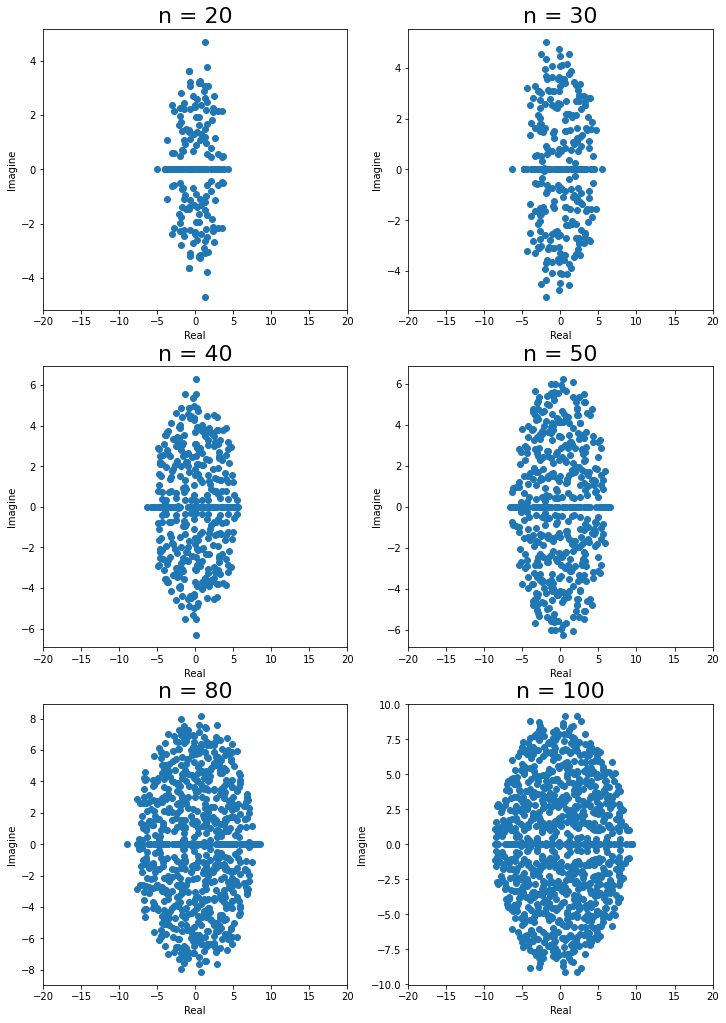

In [5]:
size_n = [20,30,40,50,80,100] #size of the matrix
MC = 10 #number of monte carlo simulations
start = time.time() #to calculate running time
eigenvalues = []
max_eigenvalues = []
for size in range(0,len(size_n)): 
    n = size_n[size]
    eigenvalues.append([])
    max_eigenvalues.append([])
    for mc in range(0,MC):
        matrix = []
        for i in range(n):
            matrix.append(np.random.uniform(0.0, sigma^2, size=n))
        ev = np.linalg.eigvals(matrix) #ev=eigenvalue
        for k in range(0,n):
            eigenvalues[size].append(ev[k])
            for j in range(0,i):
                if j <= C:
                    matrix[i][j]=matrix[j][i]
                elif j <= 0.5:
                    matrix[i][j] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                    matrix[j][i] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                elif j > 0.5:
                    matrix[j][i] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                    matrix[i][j] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                else:
                    matrix[i][j] = 0
                    matrix[j][i] = 0
                matrix[i][i] = matrix[j][j] = -d            
            
end = time.time() #to calculate running time
print("time of calculations: ",end-start," seconds")
#-------------------------------------------------------------------------------------------------------------------------
ev_re =[] #eigenvalue real part
ev_im = [] #eigenvalue imaginary part
matrix_figure=plt.figure(1,figsize=[12,30])
for size in range(0,len(size_n)):
    ev_re.append([])
    ev_im.append([])
    for i in range(0,len(eigenvalues[size])):
        ev_re[size].append(eigenvalues[size][i].real)
        ev_im[size].append(eigenvalues[size][i].imag)
    a=plt.subplot(5,2,size+1)
    plt.plot(ev_re[size],ev_im[size],'o')
    plt.xlabel('Real')
    plt.ylabel('Imagine')
    plt.xlim(-20,20)
    plt.title(' '.join(['n =',str(size_n[size])]),fontsize=22)

### Mixture of Competition and Mutualism matrix

In [6]:
S = 5 # number of species
d = 1  # value of number coefficients
C = 0.2  # desired level of connectance
sigma = 1  # standard derivation of rv X

matrix = []
for i in range(0,5):
    matrix.append(np.random.uniform(0, 1, size=5)) # Uniform distribution U(0, 1)
    for j in range(0,i):
        if j <= C:
            matrix[i][j] = matrix[j][i]
        elif j <= 0.5:
            matrix[i][j] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
            matrix[j][i] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        elif j > 0.5:
            matrix[j][i] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
            matrix[i][j] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        else:
            matrix[i][j] = 0
            matrix[j][i] = 0
        matrix[i][i] = matrix[j][j] = -d
print("Mixture of Competition and Mutualism matrix:")        
matrix

Mixture of Competition and Mutualism matrix:


[array([-1.        ,  0.96748859,  0.50786469,  0.08486007,  0.65538799]),
 array([ 0.96748859, -1.        ,  0.88766045,  0.4536281 ,  1.51061358]),
 array([ 0.50786469,  1.43116936, -1.        , -0.94579922,  1.3823685 ]),
 array([ 0.08486007, -0.62788711,  0.98207706, -1.        , -0.50940086]),
 array([ 0.65538799, -1.90606172, -0.13242113, -0.63410742, -1.        ])]

time of calculations:  6.552931070327759  seconds


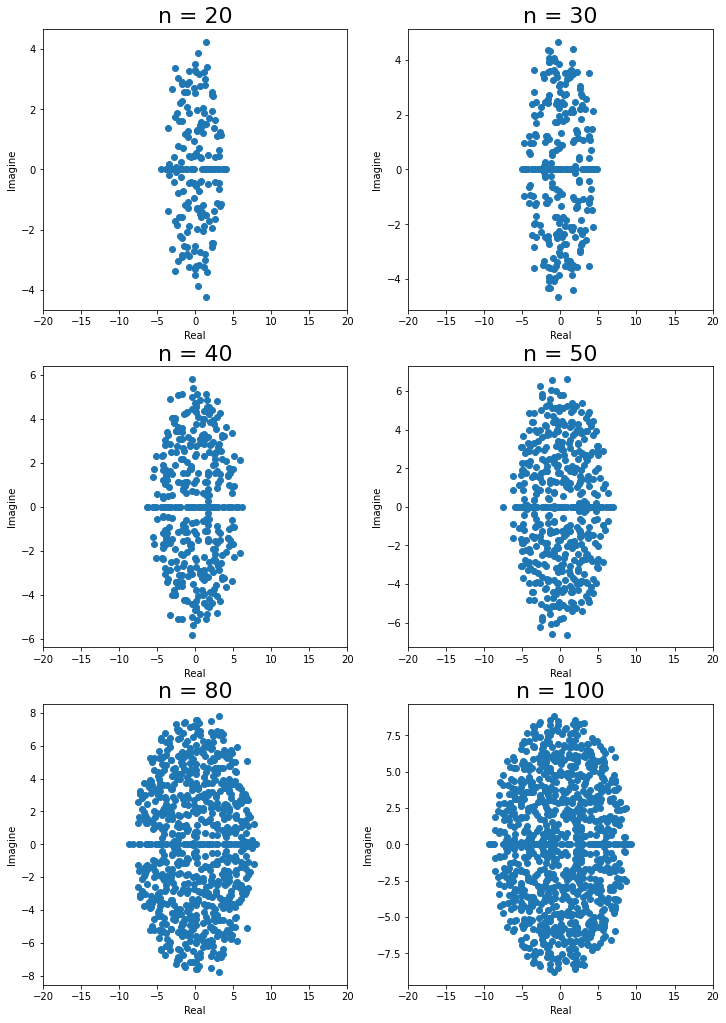

In [7]:
size_n = [20,30,40,50,80,100] #size of the matrix
MC = 10 #number of monte carlo simulations
start = time.time() #to calculate running time
eigenvalues = []
max_eigenvalues = []
for size in range(0,len(size_n)): 
    n = size_n[size]
    eigenvalues.append([])
    max_eigenvalues.append([])
    for mc in range(0,MC):
        matrix = []
        for i in range(n):
            matrix.append(np.random.uniform(0.0, sigma^2, size=n))
        ev = np.linalg.eigvals(matrix) #ev=eigenvalue
        for k in range(0,n):
            eigenvalues[size].append(ev[k])
            for j in range(0,i):
                if j <= C:
                    matrix[i][j]=matrix[j][i]
                elif j <= 0.5:
                    matrix[i][j] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                    matrix[j][i] = 0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                elif j > 0.5:
                    matrix[j][i] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                    matrix[i][j] = -0.5 * np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                else:
                    matrix[i][j] = 0
                    matrix[j][i] = 0
                matrix[i][i] = matrix[j][j] = -d            
            
end = time.time() #to calculate running time
print("time of calculations: ",end-start," seconds")
#------------------------------------------------------------------------------------------------------------
ev_re =[] #eigenvalue real part
ev_im = [] #eigenvalue imaginary part
matrix_figure=plt.figure(1,figsize=[12,30])
for size in range(0,len(size_n)):
    ev_re.append([])
    ev_im.append([])
    for i in range(0,len(eigenvalues[size])):
        ev_re[size].append(eigenvalues[size][i].real)
        ev_im[size].append(eigenvalues[size][i].imag)
    a=plt.subplot(5,2,size+1)
    plt.plot(ev_re[size],ev_im[size],'o')
    plt.xlabel('Real')
    plt.ylabel('Imagine')
    plt.xlim(-20,20)
    plt.title(' '.join(['n =',str(size_n[size])]),fontsize=22)

### Mutualistic matrix

In [8]:
S = 5 # number of species
d = 1  # value of number coefficients
C = 0.4  # desired level of connectance
sigma = 1  # standard derivation of rv X

matrix = []
for i in range(0,5):
    matrix.append(np.random.uniform(0, 1, size=5)) # Uniform distribution U(0, 1)
    for j in range(0,i):
        matrix[i][j] = matrix[j][i]
        if j <= C:
            matrix[i][j] = 0.5* np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
            matrix[j][i] = 0.5* np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
        else:
            matrix[i][j] = 0
            matrix[j][i] = 0
        matrix[i][i] = matrix[j][j] = -d
print("Mutualistic matrix:")        
matrix

Mutualistic matrix:


[array([-1.        , -0.84321519, -1.7061741 , -3.22804004, -1.1743618 ]),
 array([ 1.08013935, -1.        ,  0.        ,  0.        ,  0.        ]),
 array([ 1.00843551,  0.        , -1.        ,  0.        ,  0.        ]),
 array([-0.94812279,  0.        ,  0.        , -1.        ,  0.        ]),
 array([ 0.0414044,  0.       ,  0.       ,  0.       , -1.       ])]

time of calculations:  1.1140198707580566  seconds


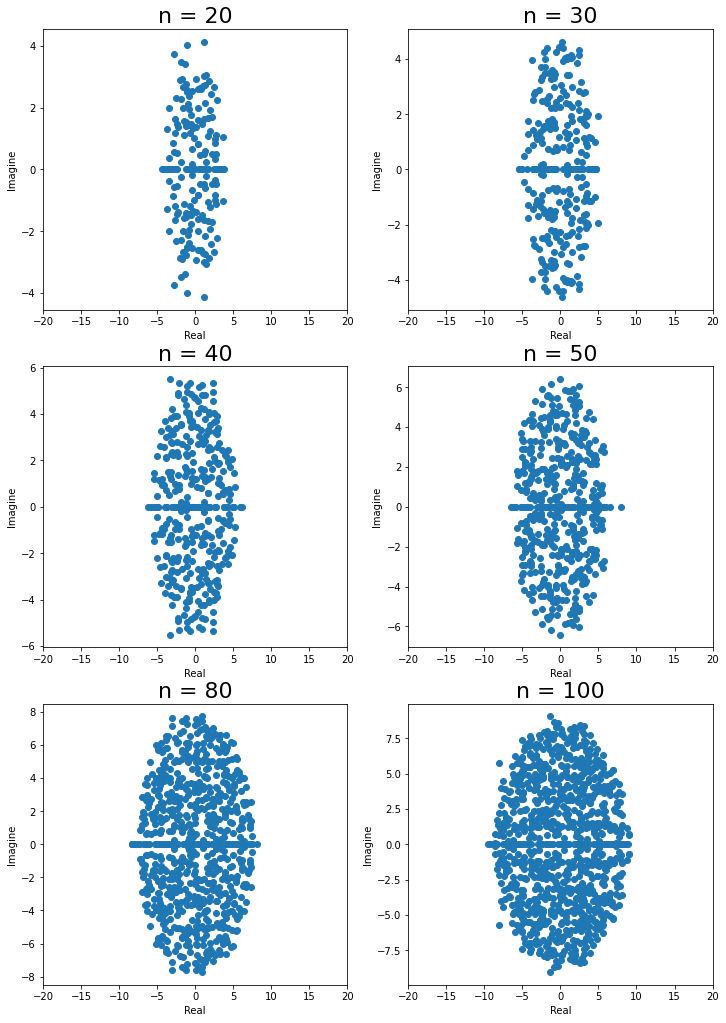

In [9]:
size_n = [20,30,40,50,80,100] #size of the matrix
MC = 10 #number of monte carlo simulations
start = time.time() #to calculate running time
eigenvalues = []
max_eigenvalues = []
for size in range(0,len(size_n)): 
    n = size_n[size]
    eigenvalues.append([])
    max_eigenvalues.append([])
    for mc in range(0,MC):
        matrix = []
        for i in range(n):
            matrix.append(np.random.uniform(0.0, sigma^2, size=n))
        ev=np.linalg.eigvals(matrix) #ev=eigenvalue
        for k in range(0,n):
            eigenvalues[size].append(ev[k])
            for j in range(0,i):
                matrix[i][j] = matrix[j][i]
                if j <= C:
                    matrix[i][j] = 0.5*np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                    matrix[j][i] = 0.5*np.random.normal(loc=0.0, scale=sigma^2) # Normal distribution N(0, sigma^2)
                else:
                    matrix[i][j] = 0
                    matrix[j][i] = 0
                matrix[i][i] = matrix[j][j] = -d            
            
end = time.time() #to calculate running time
print("time of calculations: ",end-start," seconds")
#------------------------------------------------------------------------------------------------------------------------
ev_re = [] #eigenvalue real part
ev_im = [] #eigenvalue imaginary part
matrix_figure=plt.figure(1,figsize=[12,30])
for size in range(0,len(size_n)):
    ev_re.append([])
    ev_im.append([])
    for i in range(0,len(eigenvalues[size])):
        ev_re[size].append(eigenvalues[size][i].real)
        ev_im[size].append(eigenvalues[size][i].imag)
    a=plt.subplot(5,2,size+1)
    plt.plot(ev_re[size],ev_im[size],'o')
    plt.xlabel('Real')
    plt.ylabel('Imagine')
    plt.xlim(-20,20)
    plt.title(' '.join(['n =',str(size_n[size])]),fontsize=22)

----------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import collections
import itertools

dataframe = pd.read_excel("Food-web-Dataset-PNAS-05.xls", sheet_name="Interactionstrength_matrix")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Columns: 250 entries, prey\predator to F208
dtypes: float64(244), int64(5), object(1)
memory usage: 486.5+ KB


In [3]:
df = dataframe.drop('prey\predator',axis=1)
df[df.values[:] > 0] = 1 #binarized the matrix
df

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
0,0,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0
1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0
2,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
3,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
245,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,1.0
246,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
247,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,1.0


In [21]:
G = nx.from_numpy_matrix(df.values)
#G = nx.relabel_nodes(G, dict(enumerate(df.columns))

<function matplotlib.pyplot.show(close=None, block=None)>

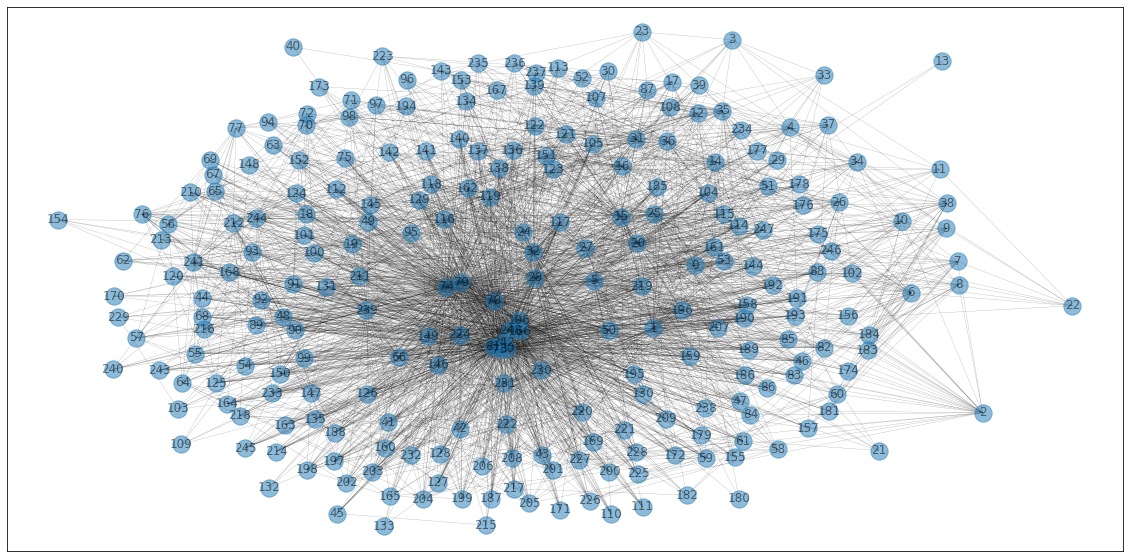

In [22]:
plt.figure(figsize=[20,10])
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), 
                 width=0.2, alpha=0.5, with_labels=True)
plt.show

In [19]:
print('Order of the network is: ' + str(len(G.nodes())))
print('Size of the network is: ' + str(len(G.edges())))

Order of the network is: 249
Size of the network is: 3313


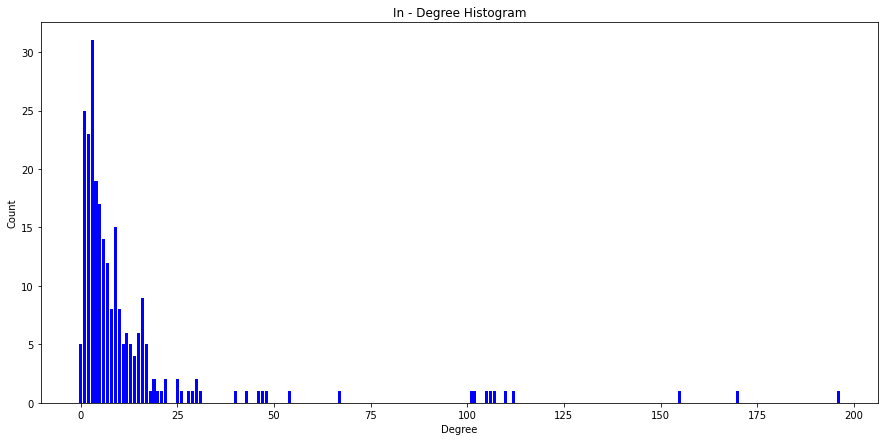

In [22]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("In - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

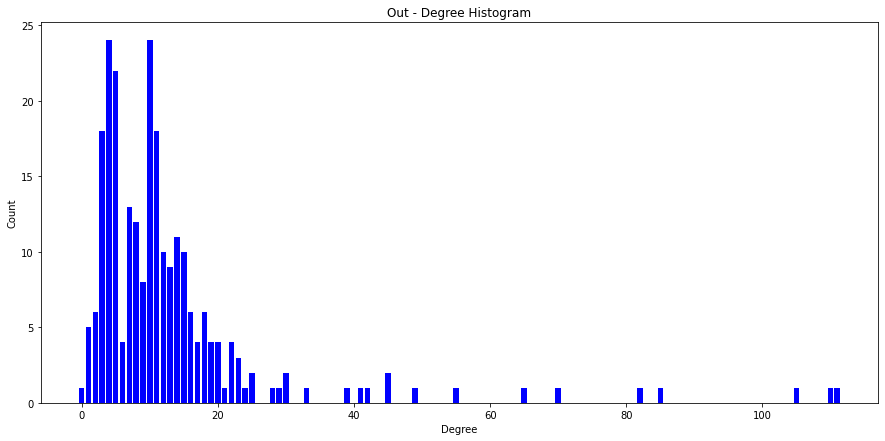

In [23]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Out - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

The out-degree and in-degree of each species represent correspondingly the vulnerability (number of predators) and generality (number of resources). Both the distributions seems to follow the power law.

------------------------------------------------------------------------------------------------------------------------

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddeding (e.g.competition,intraguild predation - intraguild predation is the killing and sometimes eating of potential competitors. This interaction represents a combination of predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

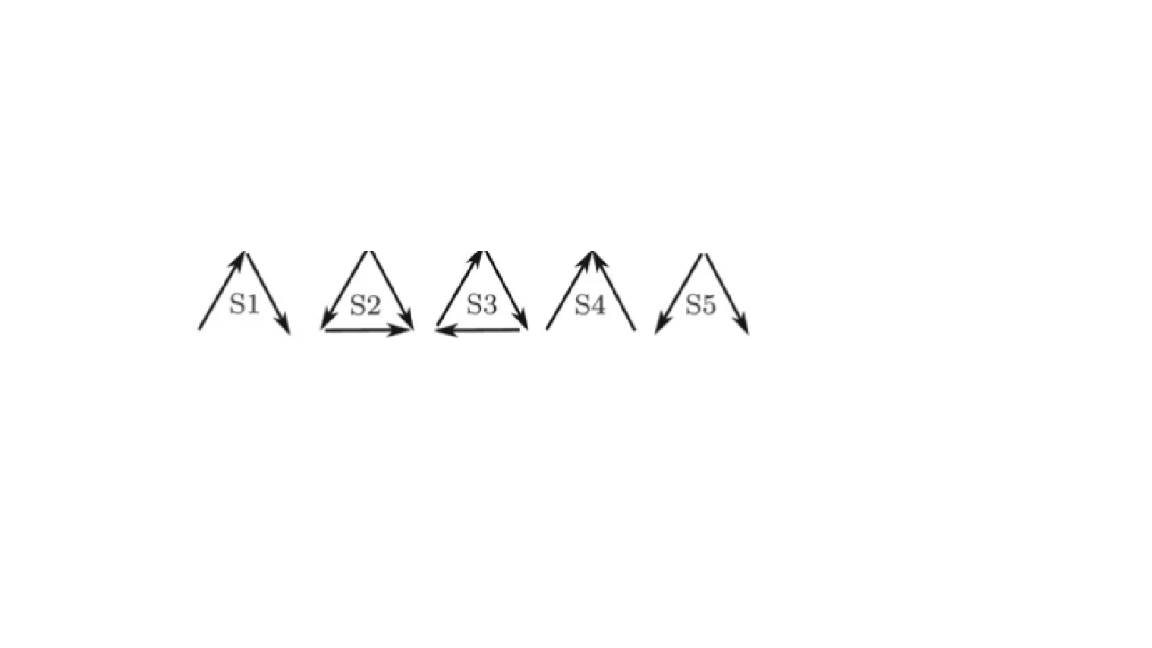

In [39]:
from IPython.display import Image
Image(filename='3-node-motif.png')

In [24]:
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
    }

In [25]:
def mcounter(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    for trip in itertools.combinations(nodes(),3):
        subg = gr.subgraph(trip)
        for keys in mo.keys():
            if nx.is_isomorphic(subg, mo[keys]):
                mcount[keys] += 1
        
    return mcount

In [28]:
mcounter(G, motifs)

{'S1': 10691, 'S2': 5289, 'S3': 0, 'S4': 85639, 'S5': 21435}

In [29]:
ans = {'S1': 10691, 'S2': 5289, 'S3': 0, 'S4': 85639, 'S5': 21435}

Text(0.5, 0, 'motif type')

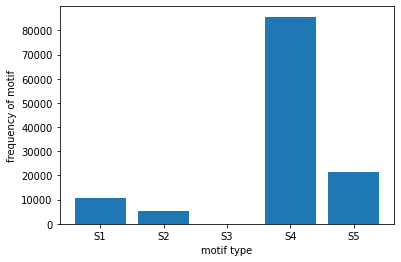

In [30]:
plt.bar(ans.keys(),ans.values())
plt.ylabel('frequency of motif')
plt.xlabel('motif type')

This shows that the network doesn’t have any of the 3-node cycle motif type. The network will generally have cycles with path length more than 3. Also the $2^{nd}$ maximum motif type is of the competition kind.

In [31]:
clust_coeff = nx.clustering(G)
avg_clust = nx.average_clustering(G)

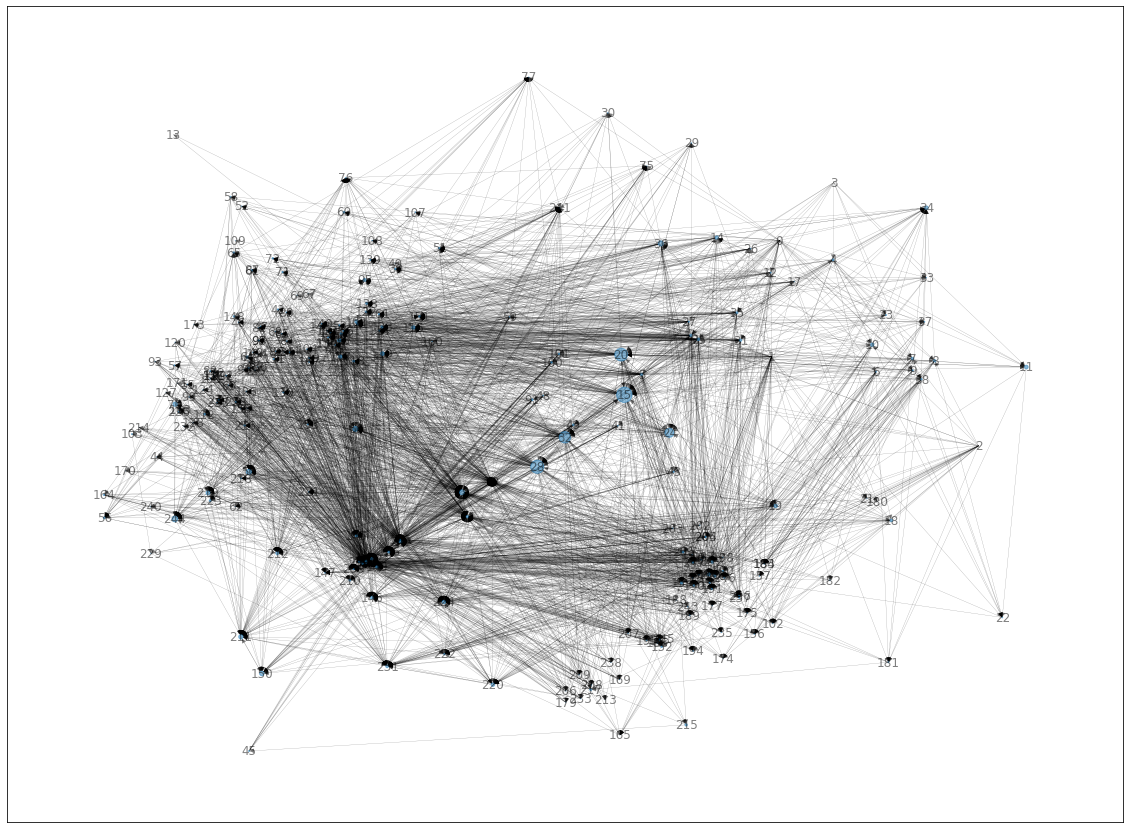

In [34]:
# Betweenness Centrality
plt.figure(figsize=[20,15])
d = dict(nx.betweenness_centrality(G))

nx.draw_networkx(G, node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),
                   alpha=0.5, width=0.2)

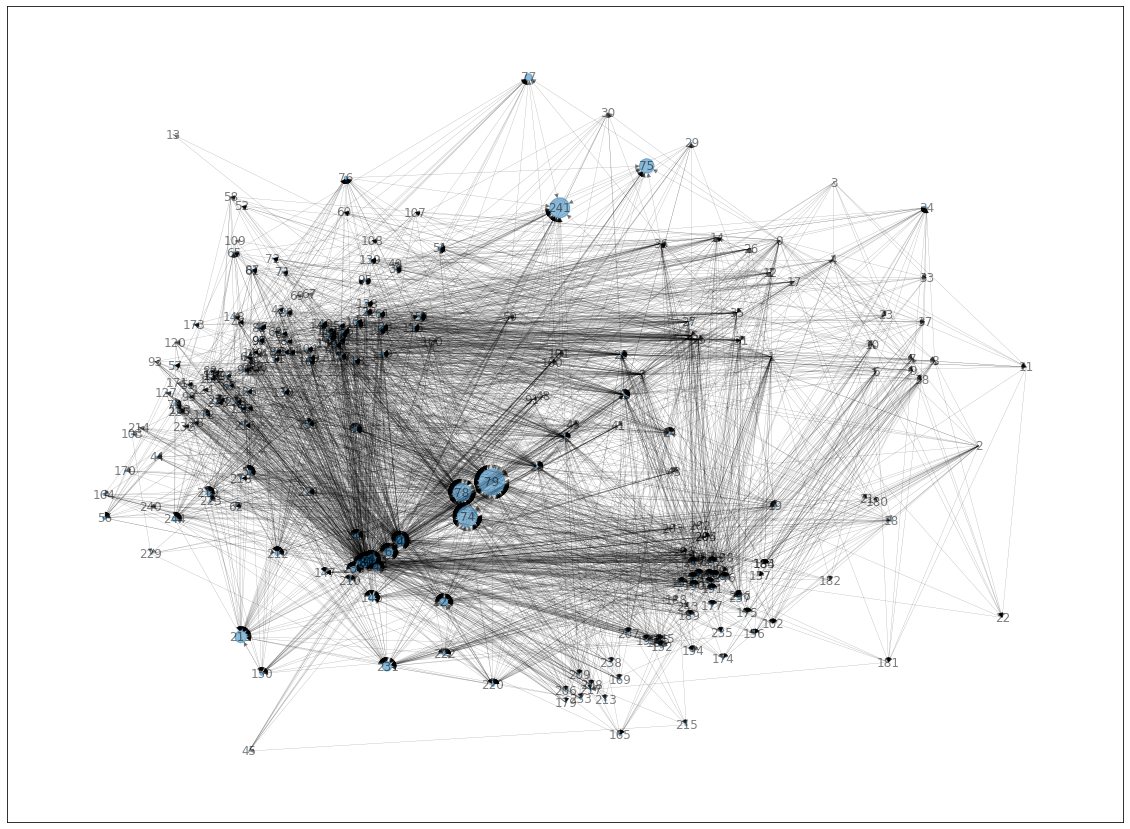

In [35]:
# Eigenvector Cetrality
plt.figure(figsize=[20,15])
d = dict(nx.eigenvector_centrality(G))

nx.draw_networkx(G, node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), alpha=0.5, width = 0.2)
plt.show()